## Red convolucinal con keras y mnist

In [7]:
import keras
keras.__version__

'2.9.0'

In [8]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7836145875357399967
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 386662400
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13712223113889143656
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1660 Ti with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


2022-07-09 19:19:42.156849: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-09 19:19:42.157304: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-09 19:19:42.157596: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-09 19:19:42.157977: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-09 19:19:42.158279: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from S

In [1]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(10, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(2, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 10)        260       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 2)           502       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 2)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 10)                3

2022-07-10 19:09:09.883513: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-10 19:09:09.929199: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-10 19:09:09.929510: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-10 19:09:09.930704: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [10]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print (train_images.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

(60000, 28, 28)


In [11]:
import time

batch_size = 50
epochs = 10

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

start = time.time()
history=model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,validation_data=(test_images, test_labels),
          verbose=1)
print("The time used to execute this is given below")
end = time.time()
print(end - start)

2022-07-09 19:20:01.546623: W tensorflow/core/common_runtime/bfc_allocator.cc:479] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.29MiB (rounded to 2400000)requested by op _EagerConst
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2022-07-09 19:20:01.546707: I tensorflow/core/common_runtime/bfc_allocator.cc:1027] BFCAllocator dump for GPU_0_bfc
2022-07-09 19:20:01.546726: I tensorflow/core/common_runtime/bfc_allocator.cc:1034] Bin (256): 	Total Chunks: 30, Chunks in use: 30. 7.5KiB allocated for chunks. 7.5KiB in use in bin. 496B client-requested in use in bin.
2022-07-09 19:20:01.546738: I tensorflow/core/common_runtime/bfc_allocator.cc:1034] Bin (512): 	Total Chunks: 0, Chunks in use: 0. 0B allocated for chunks. 0B in use in bin. 0B client-requested in use in bin.
2022-07-09 19:20:01.546750: I tensorflow/core/comm

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

untime/bfc_allocator.cc:1083] InUse at 7f93c7374500 of size 2400000 next 23
2022-07-09 19:20:01.547239: I tensorflow/core/common_runtime/bfc_allocator.cc:1083] InUse at 7f93c75be400 of size 256 next 29
2022-07-09 19:20:01.547249: I tensorflow/core/common_runtime/bfc_allocator.cc:1083] InUse at 7f93c75be500 of size 256 next 30
2022-07-09 19:20:01.547257: I tensorflow/core/common_runtime/bfc_allocator.cc:1083] InUse at 7f93c75be600 of size 256 next 31
2022-07-09 19:20:01.547265: I tensorflow/core/common_runtime/bfc_allocator.cc:1083] InUse at 7f93c75be700 of size 256 next 32
2022-07-09 19:20:01.547273: I tensorflow/core/common_runtime/bfc_allocator.cc:1083] InUse at 7f93c75be800 of size 256 next 33
2022-07-09 19:20:01.547280: I tensorflow/core/common_runtime/bfc_allocator.cc:1083] InUse at 7f93c75be900 of size 256 next 38
2022-07-09 19:20:01.547288: I tensorflow/core/common_runtime/bfc_allocator.cc:1083] InUse at 7f93c75bea00 of size 256 next 40
2022-07-09 19:20:01.547296: I tensorflow/c

In [6]:
batch_size = 50
epochs = 50

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

start = time.time()
history=model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,validation_data=(test_images, test_labels),
          verbose=1)
print("The time used to execute this is given below")
end = time.time()
print(end - start)

Epoch 1/50
1200/1200 [==============================] - 8s 6ms/step - loss: 0.1767 - accuracy: 0.9466 - val_loss: 0.1564 - val_accuracy: 0.9514
Epoch 2/50
1200/1200 [==============================] - 7s 6ms/step - loss: 0.1675 - accuracy: 0.9498 - val_loss: 0.1458 - val_accuracy: 0.9525
Epoch 3/50
1200/1200 [==============================] - 7s 6ms/step - loss: 0.1597 - accuracy: 0.9519 - val_loss: 0.1397 - val_accuracy: 0.9544
Epoch 4/50
1200/1200 [==============================] - 7s 6ms/step - loss: 0.1529 - accuracy: 0.9536 - val_loss: 0.1332 - val_accuracy: 0.9574
Epoch 5/50
1200/1200 [==============================] - 7s 6ms/step - loss: 0.1470 - accuracy: 0.9560 - val_loss: 0.1294 - val_accuracy: 0.9591
Epoch 6/50
1200/1200 [==============================] - 7s 6ms/step - loss: 0.1416 - accuracy: 0.9573 - val_loss: 0.1299 - val_accuracy: 0.9586
Epoch 7/50
1200/1200 [==============================] - 7s 6ms/step - loss: 0.1372 - accuracy: 0.9584 - val_loss: 0.1225 - val_accuracy:

In [7]:
batch_size = 50
epochs = 100

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

start = time.time()
history=model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,validation_data=(test_images, test_labels),
          verbose=1)
print("The time used to execute this is given below")
end = time.time()
print(end - start)

Epoch 1/100
1200/1200 [==============================] - 8s 7ms/step - loss: 0.0887 - accuracy: 0.9725 - val_loss: 0.0857 - val_accuracy: 0.9736
Epoch 2/100
1200/1200 [==============================] - 7s 6ms/step - loss: 0.0878 - accuracy: 0.9728 - val_loss: 0.0844 - val_accuracy: 0.9731
Epoch 3/100
1200/1200 [==============================] - 7s 6ms/step - loss: 0.0878 - accuracy: 0.9725 - val_loss: 0.0838 - val_accuracy: 0.9734
Epoch 4/100
1200/1200 [==============================] - 7s 6ms/step - loss: 0.0872 - accuracy: 0.9732 - val_loss: 0.0855 - val_accuracy: 0.9731
Epoch 5/100
1200/1200 [==============================] - 7s 6ms/step - loss: 0.0867 - accuracy: 0.9733 - val_loss: 0.0838 - val_accuracy: 0.9737
Epoch 6/100
1200/1200 [==============================] - 7s 6ms/step - loss: 0.0865 - accuracy: 0.9730 - val_loss: 0.0864 - val_accuracy: 0.9729
Epoch 7/100
1200/1200 [==============================] - 7s 6ms/step - loss: 0.0858 - accuracy: 0.9736 - val_loss: 0.0826 - val_ac

Evaluación modelo

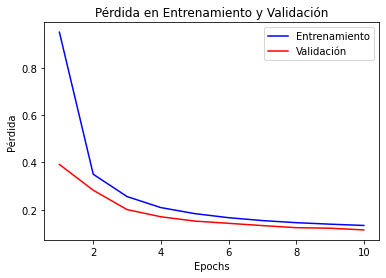

In [6]:
import matplotlib.pyplot as plt
ent_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(ent_loss) + 1)

plt.plot(epochs, ent_loss, 'b', label='Entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Validación')
plt.title('Pérdida en Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

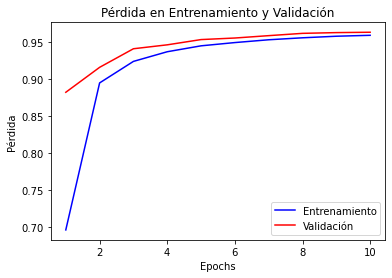

In [8]:
import matplotlib.pyplot as plt

ent_loss = history.history['accuracy']
val_loss = history.history['val_accuracy']

epochs = range(1, len(ent_loss) + 1)

plt.plot(epochs, ent_loss, 'b', label='Entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Validación')
plt.title('Pérdida en Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

In [9]:
# Guardamos el modelo
model.save('mnistCNN10epochs.h5')